In [ ]:
import pandas as pd
import numpy as np # Numpy is used for numerical computing in Python
import sklearn as sk # Scikit-learn is a machine learning library in Python that provides tools for data mining and data analysis.
import seaborn as sns # used for data visulatation 
from matplotlib import pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import  plot_model

In [ ]:
data = pd.read_csv("wisc_bc_data.csv")

In [ ]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [ ]:
data.shape

(569, 32)

In [ ]:
data.isna().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

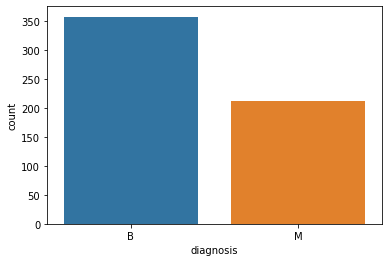

In [ ]:
sns.countplot(x="diagnosis", data=data) #shows use the visual on how many malignant and beigin patients we have in the dataset

In [ ]:
data['diagnosis'] = np.where(data['diagnosis']=='M',1,0) # this line converts all the 'M' to 1 and all the 'B' to 0

In [ ]:
data #re-run the dataset to make sure all the 'm' and 'b' have converted to '1' and '0'

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,0,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,0,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,1,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,0,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [ ]:
x = data.iloc[:,2:]

In [ ]:
x.shape

(569, 30)

In [ ]:
y =data.iloc[: , 1:2]

In [ ]:
y.shape

(569, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

In [ ]:
print(' training data is:', x_train.shape)
print('testing data is:', x_test.shape)

shape of training data is: (426, 30)
shape of testing data is: (143, 30)


In [ ]:
Classifcation_Model = Sequential()

In [ ]:
Classifcation_Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) #line is just used to set up classification 

In [ ]:
Classifcation_Model.add(Dense(units= 20, activation='relu', input_dim=30))
Classifcation_Model.add(Dense(units= 15, activation='relu'))
Classifcation_Model.add(Dense(units= 10, activation='relu'))
Classifcation_Model.add(Dense(units= 8, activation='relu'))
Classifcation_Model.add(Dense(units= 5, activation='relu'))
Classifcation_Model.add(Dense(units= 1, activation='sigmoid'))


In [ ]:
print(Classifcation_Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,234
Trainable params: 1,234
Non-trainabl

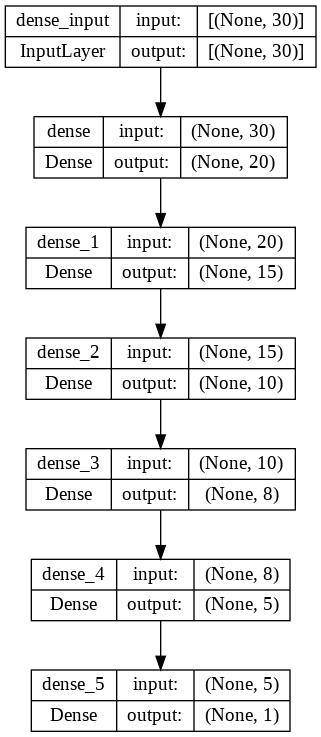

In [ ]:
plot_model(Classifcation_Model, to_file='longday.png', show_shapes=True , show_layer_names=True)

In [ ]:
history = Classifcation_Model.fit(x_train, y_train, batch_size=5,   epochs=100)

Epoch 1/100
86/86 [==============================] - 2s 3ms/step - loss: 2.1045 - accuracy: 0.6315
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8662
Epoch 3/100
86/86 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8756
Epoch 4/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3121 - accuracy: 0.8756
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8920
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.9038
Epoch 7/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9108
Epoch 8/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9014
Epoch 9/100
86/86 [==============================] - 0s 3ms/step - loss: 0.2518 - accuracy: 0.9038
Epoch 10/100
86/86 [==============================] - 0s 3ms/step - loss: 0.2347 - accuracy: 0.8991
Epoch 11/

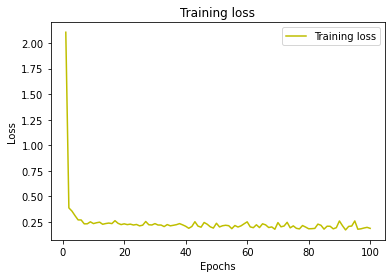

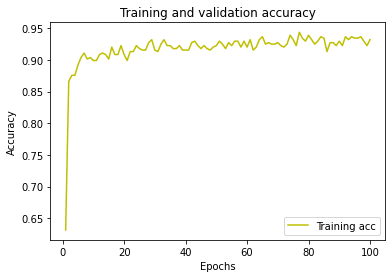

In [ ]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
pl.plot(epochs, loss, 'y', label='Training loss')
pl.title('Training loss')
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.legend()
pl.show()

acc = history.history['accuracy']  #Use accuracy if acc doesn't work
pl.plot(epochs, acc, 'y', label='Training acc')
pl.title('Training and validation accuracy')
pl.xlabel('Epochs')
pl.ylabel('Accuracy')
pl.legend()
pl.show()

In [ ]:
x_test #calling the test data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
356,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.01952,0.1934,0.06285,...,10.42,23.22,67.08,331.6,0.1415,0.12470,0.06213,0.05588,0.2989,0.07380
556,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.1183,0.10490,0.08105,0.06544,0.2740,0.06487
283,13.640,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.05660,...,14.85,19.05,94.11,683.4,0.1278,0.12910,0.15330,0.09222,0.2530,0.06510
495,12.880,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,0.07253,...,15.05,24.37,99.31,674.7,0.1456,0.29610,0.12460,0.10960,0.2582,0.08893
364,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,16.21,29.25,108.40,808.9,0.1306,0.19760,0.33490,0.12250,0.3020,0.06846
94,14.220,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,...,15.74,37.18,106.40,762.4,0.1533,0.93270,0.84880,0.17720,0.5166,0.14460
227,20.180,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
25,13.800,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.1411,0.35420,0.27790,0.13830,0.2589,0.10300


In [ ]:
prediction = Classifcation_Model.predict(x_test)
prediction = [1 if y > 0.5  else 0 for y in prediction] ## if the prediction value is over 0.5 print out 1 for malignant if its less than 0.5 print out 0 
prediction

5/5 [==============================] - 0s 2ms/step


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [ ]:
len(prediction) #the length of the test dataset 

143

In [ ]:
type(prediction) #list out the results 

list

In [ ]:
type(y_test)

pandas.core.frame.DataFrame

In [ ]:
pred = pd.DataFrame(prediction)

In [ ]:
type(pred)

pandas.core.frame.DataFrame

In [ ]:
pred = pred.values

In [ ]:
y_test_ndarray = y_test.values

In [ ]:
total = 0 #just a base number it will change when prgram is ran 
correct = 0 # just a place holder so it starts from 0 
wrong =0

for i in range(len(pred)): #Every prediction the model makes is iterated over in this loop.
    total = total+1 #increase total count by 1
    if(y_test_ndarray[i]== pred[i]): #check to see if ndarray and pred is match if yes put the place holder 1 
      correct = correct+1 # if its correct increase  correct by 1
    else:
       wrong = wrong+1 #if wring increas wrong by 1 
print('Total = ' + str(total))
print('Correct = ' + str(correct) + ' - Parcentage correct: ' + str(round((correct/total)*100, 2))+'%')
print('Wrong = ' + str(wrong) + ' Parcentage wrong: ' + str(round((wrong/total)*100, 2)) + '%')

Total = 143
Correct = 127 - Parcentage correct: 88.81%
Wrong = 16 Parcentage wrong: 11.19%
